In [1]:
from config import setting
from module import const
from module import machine_learning_model  # AlexNet, get_input_size_into_FLATTEN

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

from PIL import Image

from gradcam import GradCAM, GradCAMpp
from gradcam.utils import visualize_cam

config directory has been initialized as a package
module directory has been initialized as a package


In [2]:
# datasets_npz_x1からそれぞれのlabelで最初のデータを取得
CATEGORIES = ["S10C", "S15C", "S25C", "S35C", "S45C", "S55C"]

datasets_npz_x1 = np.load(
    setting.const.APP_PATH + "/dataset_npz/x.1_dataset/sc_x10_960_x1.npz"
)

images = datasets_npz_x1["x"]
labels = datasets_npz_x1["y"]

S10C = []
S15C = []
S25C = []
S35C = []
S45C = []
S55C = []

label_index = None

index = 0

for i, label in enumerate(labels):
    match label:
        case 0:
            S10C.append(images[i])
            index += 1

        case 1:
            S15C.append(images[i])
            index += 1

        case 2:
            S25C.append(images[i])
            index += 1

        case 3:
            S35C.append(images[i])
            index += 1

        case 4:
            S45C.append(images[i])
            index += 1

        case 5:
            S45C.append(images[i])
            index += 1

        case _:
            print("no match")

    # if S10C is not None and S15C is not None and S25C is not None and S35C is not None and S45C is not None and S55C is not None:
    # break


print("index")
print(index)

print(
    "CATEGORIES TYPE: S10C:{}, S15C:{}, S25C:{}, S35C:{}, S45C:{}, S55C:{} ".format(
        type(S10C), type(S15C), type(S25C), type(S35C), type(S45C), type(S55C)
    )
)

index
290
CATEGORIES TYPE: S10C:<class 'list'>, S15C:<class 'list'>, S25C:<class 'list'>, S35C:<class 'list'>, S45C:<class 'list'>, S55C:<class 'list'> 


/usr/local/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.10/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


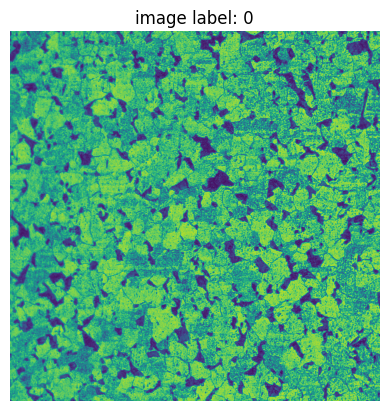

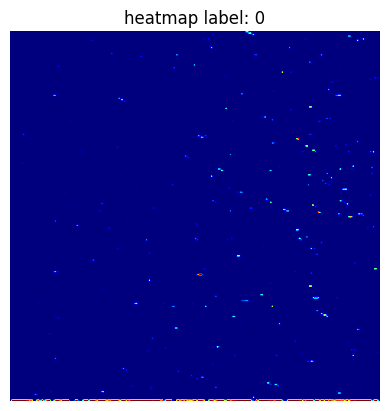

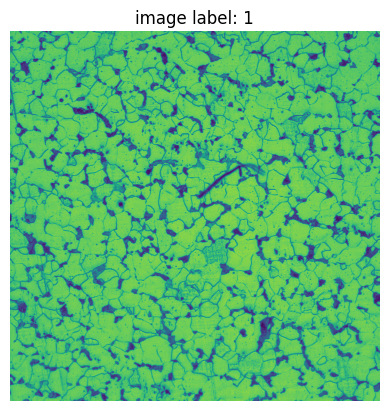

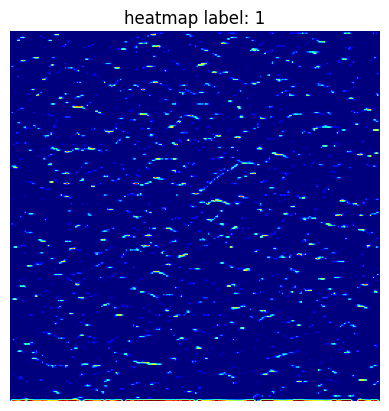

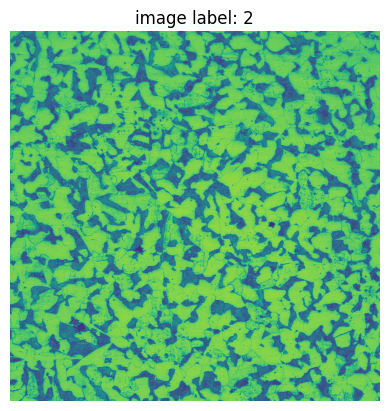

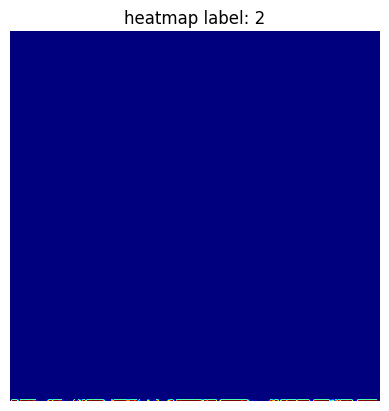

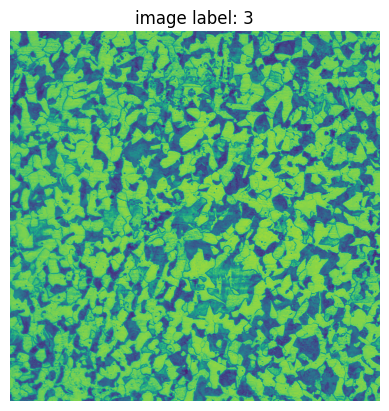

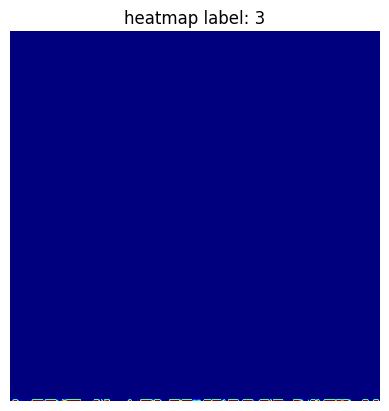

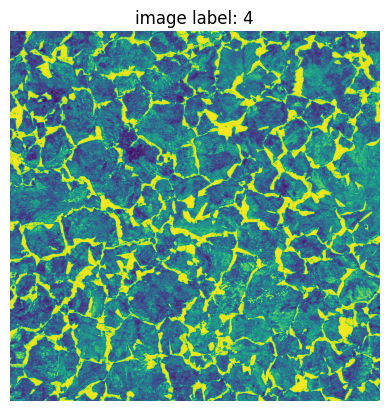

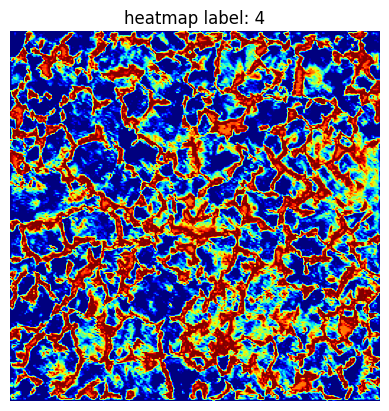

In [3]:
def exec_gradcam(model, target_layer, image, label):
    dispaly_image = image

    image = Image.fromarray(image)
    image = image.convert("RGB")
    image = image.resize((256, 256))
    image = np.asarray(image, np.float32)
    image = image.astype(float) / 255.0
    image = torch.from_numpy(image).float().permute(2, 0, 1).unsqueeze(0)

    gradcam = GradCAM(model, target_layer)

    heatmap = gradcam(image, label)

    # ヒートマップを適切な形式に変換(正規化)
    heatmap = heatmap[0].squeeze().cpu().numpy()
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
    heatmap = heatmap.astype(np.float32)
    heatmap = torch.from_numpy(heatmap)

    # 元の画像に可視化をオーバーレイ
    visualization = visualize_cam(heatmap, image)

    plt.imshow(dispaly_image)
    plt.axis("off")
    plt.title("image label: {}".format(label))
    plt.show()

    visualization_np = visualization[0][0].cpu().numpy()
    plt.imshow(visualization_np, cmap="jet")
    plt.axis("off")
    plt.title("heatmap label: {}".format(label))
    plt.show()


n_output = 6
n_hidden = 128

model = machine_learning_model.AlexNet(n_output, n_hidden)

filename = setting.const.APP_PATH + "/app/AlexNet_model_max_weight.pth"
model.load_state_dict(torch.load(filename, map_location="cpu"))
model.eval()

target_layer = model.features[0]

exec_gradcam(model, target_layer, S10C[0], 0)
exec_gradcam(model, target_layer, S15C[0], 1)
exec_gradcam(model, target_layer, S25C[0], 2)
exec_gradcam(model, target_layer, S35C[0], 3)
exec_gradcam(model, target_layer, S45C[0], 4)
# exec_gradcam(model, target_layer, S55C[0], 5)